# Part II - Loan and Borrower Analysis
## by William Bartlett




## Investigation Overview


> In this investigation I wanted to understand how various borrower attribrutes and loan specifications affected the outcome of a loan. In particular I focused on borrower interest rates and homeownership. 



## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, and borrower income. This dataset has plenty of both quantitative and qualitative datapoints on the specifications of the loan, and the attributes of the borrower.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower Interest Rates

> Borrower interest rates have a large range in this dataset, but most fall between 10 and 30% with the mean interest amount around 20%. This means that there are a lot of high interest rate loans in this dataset. 


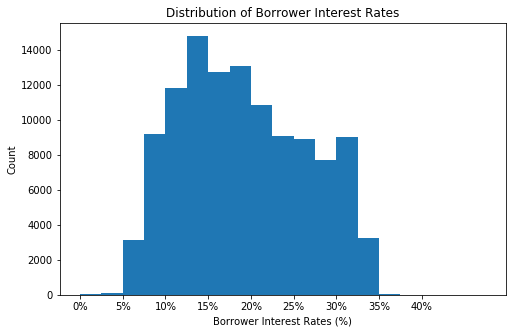

In [3]:
ticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
ticks_new = []
for n in ticks:
    ticks_new.append('{:,.0%}'.format(n))
bins = np.arange(0, loan_df['BorrowerRate'].max(), .025)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x ='BorrowerRate', bins = bins)
plt.title('Distribution of Borrower Interest Rates')
plt.xticks(ticks, ticks_new)
plt.xlabel('Borrower Interest Rates (%)')
plt.ylabel('Count');

## Interest Rates vs. Loan Status

> I really wanted to see the impact of Borrower Interest Rates on Loan Status so I narrowed the dataset to include loans of the exact same loan term, credit score, and listing category. These loans are all have 3 year terms, 680 borrower credit scores, and are debt consolidation loans. All three values were very commonplace in the dataset. I also narrowed down the monthly income so that all these loanees have incomes around the median of the entire dataset. In essence these loans have all have a very similar risk profile. I then created a violin plot with Borrower Interest Rate on the Y axis and Loan status on the x axis. It is very clear now that higher interest rates make are correllated with worse loan outcomes simply because they are more expensive to pay back. Look spefically at Current Loans vs Chargedoff loans in this chart.

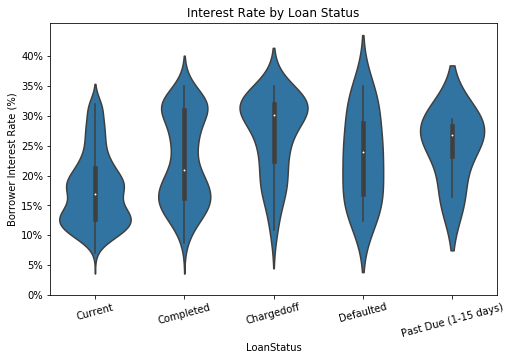

In [4]:
loan_status_df = loan_df[(loan_df['LoanStatus'] == 'Chargedoff') | (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Current') | (loan_df['LoanStatus'] == 'Defaulted') | (loan_df['LoanStatus'] == 'Past Due (1-15 days)')] 
loan_df_multi = loan_status_df[(loan_status_df['Term'] == 36) & (loan_status_df['CreditScoreRangeLower'] == 680) & (loan_status_df['ListingCategory (numeric)'] == 1)]
loan_df_multi_income = loan_df_multi[(loan_df_multi['StatedMonthlyIncome'] > 4400) & (loan_df_multi['StatedMonthlyIncome'] < 5300)]
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = loan_df_multi_income, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.ylabel('Borrower Interest Rate (%)')
plt.xticks(rotation = 15)
plt.yticks(ticks, ticks_new)
plt.title('Interest Rate by Loan Status');

## Homeownership and Loan Status

> I want to analyze the effect of homeownership on Loan Status so i started to plotting the distribution of Loan Status for homeowners and non-homeowners. People who own homes have more positive loan outcomes (Current and Completed) and fewer negative loan outcomes (Defaulted and Chargedoff) than those people who do not own homes.

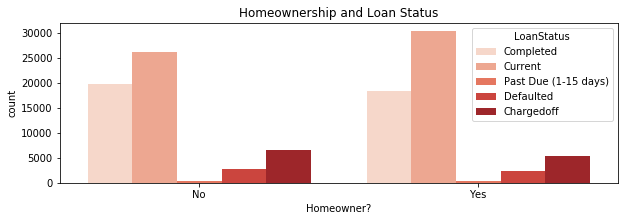

In [5]:
plt.figure(figsize = [10, 10])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_status_df, x = 'IsBorrowerHomeowner', hue = 'LoanStatus', palette = 'Reds')
plt.title('Homeownership and Loan Status')
plt.xlabel('Homeowner?')

plt.xticks([False, True], ['No', 'Yes']);

## Homeowners vs. Non-Homeowners: Monthly Payment Distribution by Loan Status

>This is a super interesting graph that illustrates a major finding. First, look at the difference in average monthly payment between homeowners and non-homeowners for Completed and Current Loan Statuses, which represent positive loan outcomes. Now look at the difference for Defaulted and Chargedoff loans, which represent negative loan outcomes. Do you see how this is a much bigger difference in average for the negative loan outcomes? When homeowners did have a negative loan outcome(status) they had signicanlty higher monthly payments than non-homeowners on average. This tells me generally in cases where homeowners did face difficulty it was partly because of the higher monthly payment when compared to their counterparts who also faced difficulty and were paying much less per month. This is more evidence that homeowners are better borrowers than non-homeowners generally. 

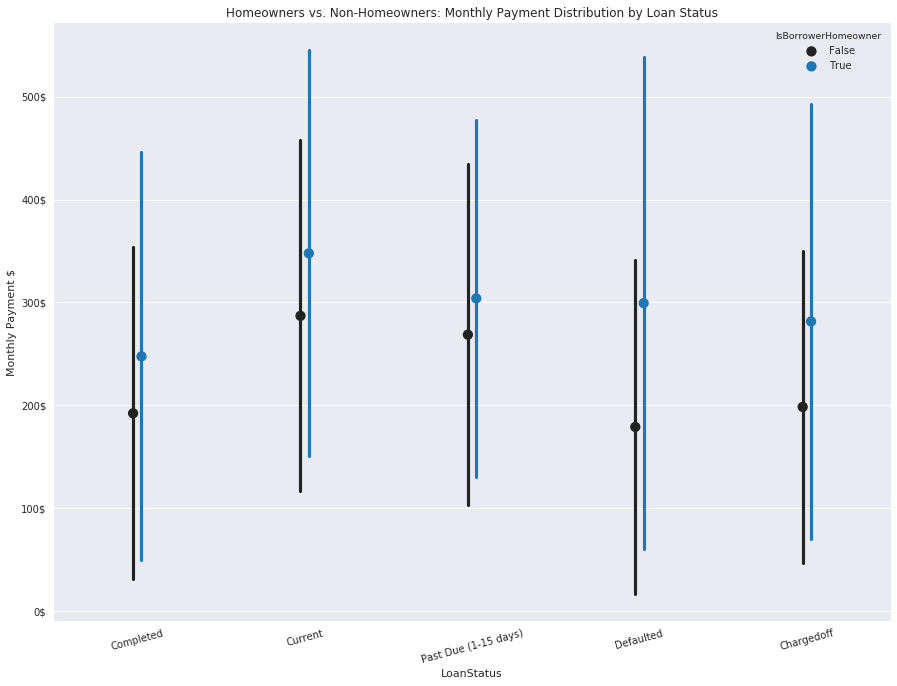

In [9]:
sb.pointplot(data = loan_status_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', 
             color = base_color, hue = 'IsBorrowerHomeowner', ci = 'sd', 
             linestyles = "", dodge = True);
sb.set(rc={'figure.figsize':(14,10)})
plt.yticks([0,100,200,300,400,500], ['0$', '100$', '200$', '300$', '400$', '500$'])
plt.xticks(rotation = 15)
plt.ylabel('Monthly Payment $')
plt.title('Homeowners vs. Non-Homeowners: Monthly Payment Distribution by Loan Status');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 391115 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
